# Análise Exploratória de Dados (EDA) com Python

Este é um projeto de análise de dados que explora o *jobs in data* dataset.
O sumário abaixo explica  as diversas seções que serão abordadas no projeto.


## Sumário


1. Material
2. Introdução a Análise Exploratória de Dados
3. Pré-requisitos
4. Importação das dependências
5. Descrição do conjunto de Dados
6. Importação do conjunto de Dados
7. Overview do conjunto de Dados
8. Análise de anomalias no conjunto
9. Análise Univariada
10. Análise Multivariada



# 1. Material
O conjunto de dado que será utilizado aqui será um dataset aberto disponível no Kaggle: https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data.

Na seção 8 descutirei mais sobre os detalhes dos dados.

#2. Introdução a Análise Exploratória de Dados
Quando estamos analisando um conjunto de dados novo, há algumas perguntas que são interessantes de se fazer para entendermos melhor o comportamento dos dados, como por exemplo: 'Como os dados são distribuídos ?', 'Existe valores faltantes, outliers ou anomalias?', 'Existe relações entre as variáveis, se sim, quais?',' Como adequar os dados para um algoritmo de aprendizagem de máquina? Qual é o melhor?'

Podemos responder todas essas perguntas por meio da análise exploratória de dados. Assim, esta análise é fundamental para o conhecimento sobre os dados e sua visualização.



# 3. Pré-requisitos

Para a análise de dados em Python é utilizada quatro dependencias populares. Duas delas são responsáveis pela a análise de dados ***Numpy*** e ***Pandas***, e duas para a visualização de dados ***Matplotlib*** e ***Seaborn***.


*   Numpy: É uma dependência importante para computação científica, que permite trabalhar com arrays multidimensionais (como matrizes) e realizar operações matemáticas complexas de forma rápida.

*   Pandas: Permite trabalhar com dados tabulares (como planilhas e bancos de dados) de forma eficiente.

* Matplolib:  Matplotlib é a ferramenta clássica para criar gráficos e visualizações em Python.
* Seaborn:  Seaborn é como uma versão turbinada do Matplotlib, focada em visualizações estatísticas.





#4. Importação das dependências
Com as dependências citadas na seção anterior precisamos importá-las no ambiente, utilizamos alias para importação pois fica mais fácil manipulá-las no código do projeto.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#5. Descrição do Conjunto de Dados
Os dados contidos no dataset a ser trabalhado é referente à vagas e salários na área de Dados. Ele contém 9355 instâncias e 12 atributos.

Informações dos atributos do conjunto de Dados:


1.   work_year -  O ano que o dada foi disponibilizado (2020,2021,2022,2023).
2.   job_title - O título da vaga do emprego, que contém 125 categorias.
3.  job_category - Classificação da vaga de emprego, que contém 10 classificações.

Data Engineering,Data Architecture and Modeling,Data Science and Research,Machine Learning and AI,Data Analysis,Leadership and Management,BI and Visualization,Data Quality and Operations,Data Management and Strategy,Cloud and Database.

4. salary_currency - A moeda na qual o salário é pago, que contém 11 categorias.

EUR, USD, GBP, CAD, AUD, PLN, BRL, TRY,CHF,SGD, DKK.

5. salary - O salário bruto anual na moeda local.

6. salary_in_usd - O salário bruto anual convertido para dólares.

7. employee_residence - O local de residência do empregado, que contém 87 países diferentes.

8. experience_level - Classificação da experiência dos profissionais em 4 categorias.

Mid-level, Senior,Executive, Entry-level

9. employment_type - O tipo de empregabilidade que contém 4 categorias.

Full-time,Part-time,Contract, Freelance.

10. work_setting - O tipo de regime de trabalho divido em 3 categorias

Hybrid, In-person, Remote.

11. company_location - O país que a empresa está localizada com 70 categorias.

12. company_size -  O tamanho da empresa que o empregado trabalho com 3 categorias.

S, M, L( small, medium, large).



# 6. Importando o conjunto de dados

Utilizando o método **read_csv** para importar o conjunto de dados.

Geralmente, os arquivos csv são separados por vírgula. Como este conjunto de dados também é separado por vírgula, não há a necessidade de utilizar o parâmetro sep para especificar outro tipo de separador utilizado no arquivo.


In [ ]:
df = pd.read_csv("jobs_in_data.csv")


# 7. Overview do conjunto de dados

Agora  veremos informações básica do conjunto de dados, como colunas, tipos de dados e as dimensões.


## Dimensão do conjunto

In [ ]:
df.shape

(9355, 12)

**Interpretação**

O dado tem 9355 linhas e 12 colunas.

##  Nome das colunas

In [ ]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

## Visão geral do conjunto de dados

Podemos ver as 5 primeiras linhas do conjunto de dados a partir do método **head()**

In [ ]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


## Tipo dos dados
 Para checar os tipos dos dados de cada coluna utiliza-se o método **dtypes**

In [ ]:
df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary,int64
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object


## Sumário dos dados

Podemos obter uma descrição resumida das estatísticas das variáveis numéricas a partir do método **describe()**. O que permite no futuro a identificação de possíveis ouliers no conjunto de dados.

In [ ]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


**Interpretação**
A estatísitica da coluna salary não pode ser comparada de modo direto pois a mesma representa o valor do salário bruto anual de diferentes moedas.

## Análise de anomalias no conjunto

Nesta seção analisaremos se há discrepância nos dados.

## Checagem de dados faltantes
Podemos checar se há dados faltantes usando o método **isnull().sum()**, isto retorna a soma dos dados faltantes em cada coluna.

In [ ]:
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


**Interpretação**
O conjunto de dados não apresenta nenhum dado faltante.

# Análise Univariada
Podemos analisar por meio de tabela as medidas de centralidade e dispersão por meio do método **describe()**


In [ ]:
df['salary_in_usd'].describe()

,salary_in_usd
count,9355.000000
mean,150299.495564
std,63177.372024
min,15000.000000
25%,105700.000000
50%,143000.000000
75%,186723.000000
max,450000.000000


**Interpreetação**

Os valores count, min e max representam o valor da ocorrência, mínimo e máximo da variável 'salary_in_usd'.

As medidas de centralidade são dados pela média : (150299.495564) e mediana - 50% : (143000.00).

As medidas de dispersão é dada pelo desvio padrão(std) - 63177.372024.

Os quartis são representados por 25%,50%,75%. E o intervalo interquantílico (IQR) é a subtração entre 75% a 25%, IQR = 81023.00

## Medida do formato da distribuição

Podemos iniciar a investigação do formato da distribuição dos dados. Temos duas estatística que auxiliam no entendimento do formato da distribuição dos dados a assimetria e curtose.


## Assimetria
Para checarmos a assimetria da distribuição utilizamos o método **skew()**.

In [ ]:
df['salary_in_usd'].skew()

0.6212912531604922

**Interpretação**

O valor de assimetria tido é aproximadamente 0.62, isto indica que o dado é levemente assimétrico para a direita.

<ipython-input-11-73df3c6158c3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["salary_in_usd"])


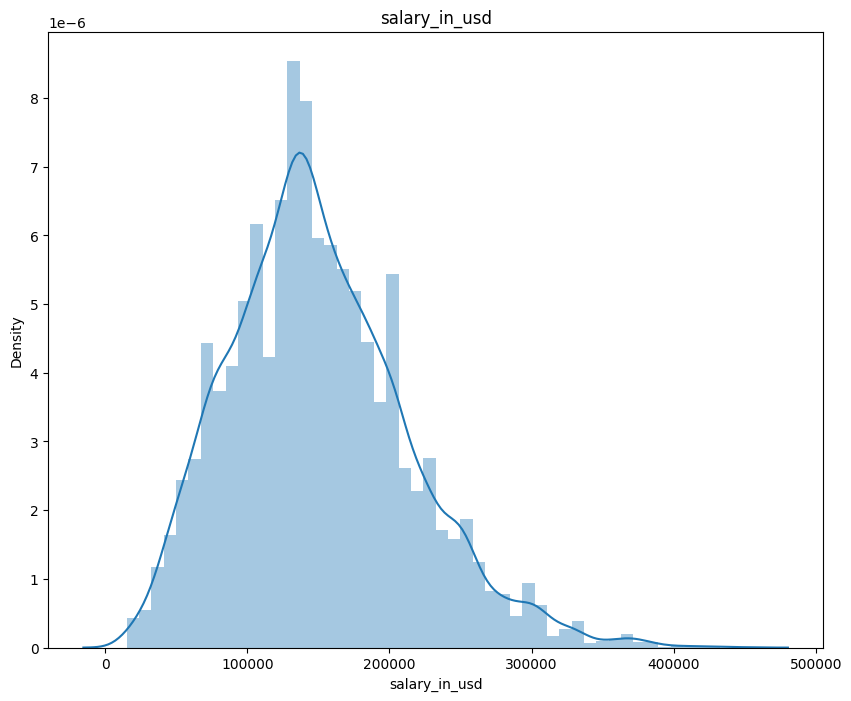

In [ ]:
plt.figure(figsize= (10,8))
sns.distplot(df["salary_in_usd"])
plt.title("salary_in_usd")
plt.show()

**Interpretação**

O gráfico acima evidência visualmente o que vimos com a métrica de assimetria.

## Curtose
Podemos calcular a curtose do formato por meio do método **kurt()**.

In [ ]:
df['salary_in_usd'].kurt()

0.5672418328471021

**Interpretação**

O valor de kurtoise da variável 'salary_in_usd' é menor do que 3. Portanto, podemos concluir que a curva de distribuição tem suas caudas mais curtas e com menos peso.

## Distribuiição da váriavel alvo 'salary_in_usd'


In [ ]:
y =df['salary_in_usd']

<ipython-input-14-97503febeb78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)


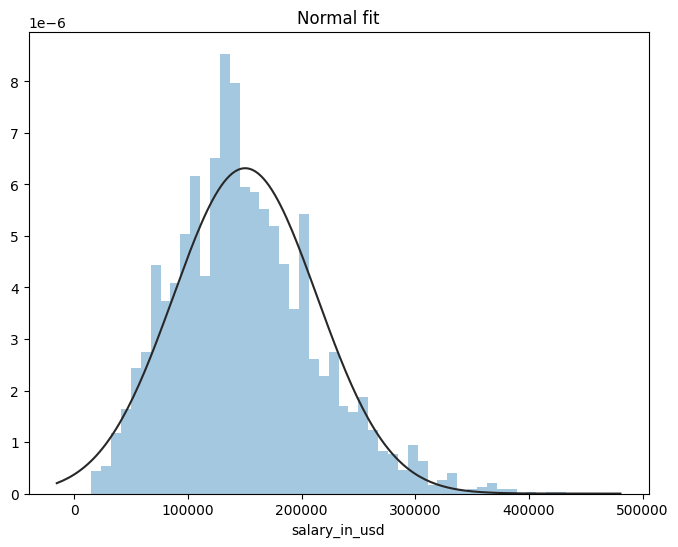

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(y, kde=False, fit=st.norm)
plt.title('Normal fit')
plt.show()

Vemos aqui neste gráfico que a distribuição normal aparenta se encaixar bem com está distribuição.

## Resultados da análise univariada

* A variável alvo salary_in_usd é levemente assimetrica
* A curva de distribuição é uma
curva platicúrtica.
* Os dados da variável alvo segue aproximadamente a distribuição normal.


# Análise Multivariada

## Relações entre variável alvo e outras variáveis

Iremos analisar a relação entre as variáveis categóricas e númericas com a variável alvo.

## Distribuição e visualização das variáveis

'job_title' é uma variável categorica. Podemos analisar as categorias existentes dela e a quantidade em cada uma, utilizando o método **value_counts()**

In [ ]:
df['job_title'].value_counts().head(10)

,count
job_title,
Data Engineer,2195
Data Scientist,1989
Data Analyst,1388
Machine Learning Engineer,991
Applied Scientist,272
Research Scientist,269
Analytics Engineer,256
Data Architect,213
Business Intelligence Engineer,144


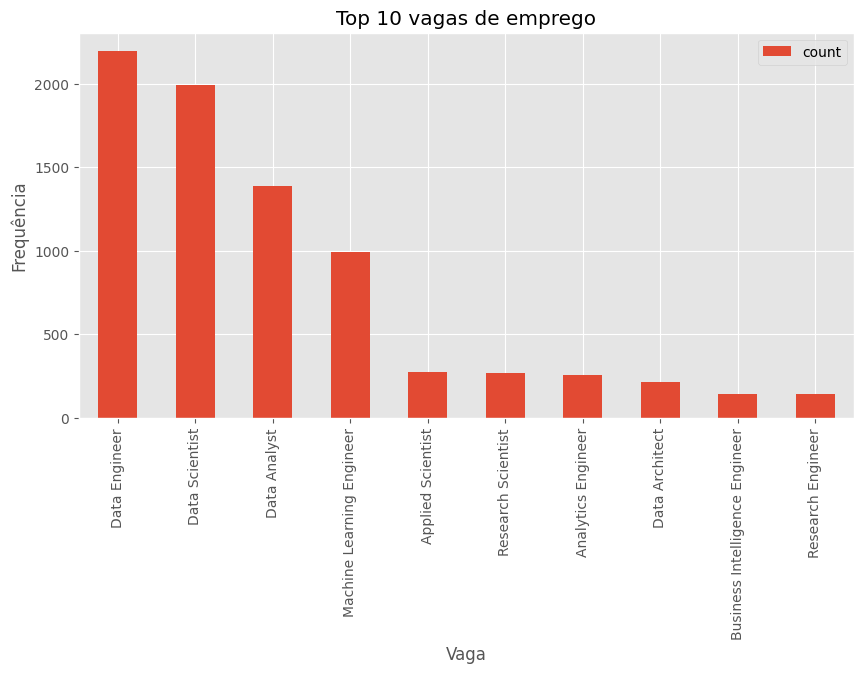

In [ ]:
df['job_title'].value_counts().head(10).plot(kind = 'bar', figsize=(10,5))

plt.title('Top 10 vagas de emprego')
plt.xlabel('Vaga')
plt.ylabel('Frequência')
plt.legend()
plt.show()

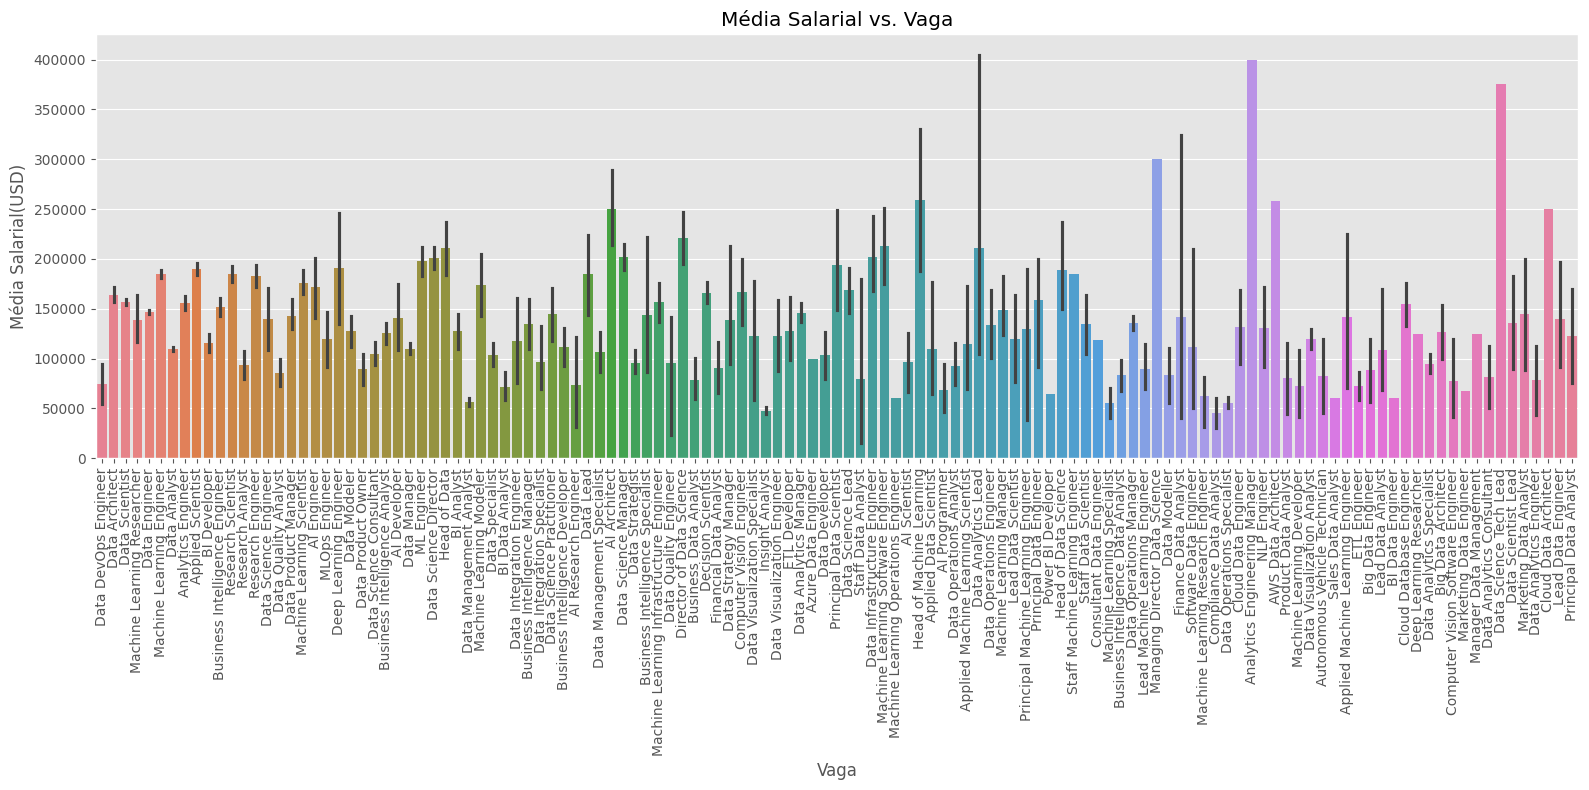

In [ ]:
#
plt.figure(figsize=(16, 8))
sns.barplot(x='job_title', y='salary_in_usd', data=df,hue='job_title')
plt.xticks(rotation=90)
plt.xlabel('Vaga')
plt.ylabel('Média Salarial(USD)')
plt.title('Média Salarial vs. Vaga')
plt.tight_layout()
plt.show()


**Conclusão**

*Job_title* tem 125 categorias. Esses valores representam cada título de vaga no ramo de dados. As 10 vagas com maior número de trabalhadores na área de dados são:

    1. Engenheiro de dados  2195
    2. Cientista de Dados 	1989
    3. Analista de Dados	1388
    4. Engenheiro de Machine Learning	991
    5. Cientista Aplicado	272
    6. Ciestista Pesquisador	269
    7. Engenheiro Analítico	256
    8. Arquiteto de Dados	213
    9. Engenheiro de  BI 	144
    10. Engenheiro Pesquisador 144

Porém as 10 vagas que possuem a maior média salarial, em dólar, podem ser vistas no gráfico são:

    1. Gerente de Engenharia Analítica
    2. Líder de Tecnologia em Ciência de Dados
    3. Diretor Geral de Ciência de Dados
    4. Arquiteto de Dados AWS
    5. Chefe de Machine Learning
    6. Arquiteto de Dados Cloud
    7. Arquiteto de IA
    8. Diretor de Ciência de Dados
    9. Chefe de Dados
    10. Engenheiro de Software de Machine Learning

 Podemos perceber que as vagas mais bem remuneradas estão concentrada nas vagas de liderança. Por exemplo, existe somente 1 Gerente de Engenharia Analítica no banco de dados que recebe anualmente bruto 399880.00 dolares. Enquanto existem 2195 Engenheiros de Dados que ganham em média 146620.10 dolares.



Faremos uma análise similar para o restante das variáveis

In [ ]:
df['company_location'].value_counts().head(10)

,count
company_location,
United States,8132
United Kingdom,449
Canada,226
Spain,113
Germany,72
France,50
Australia,24
Portugal,24
Netherlands,21


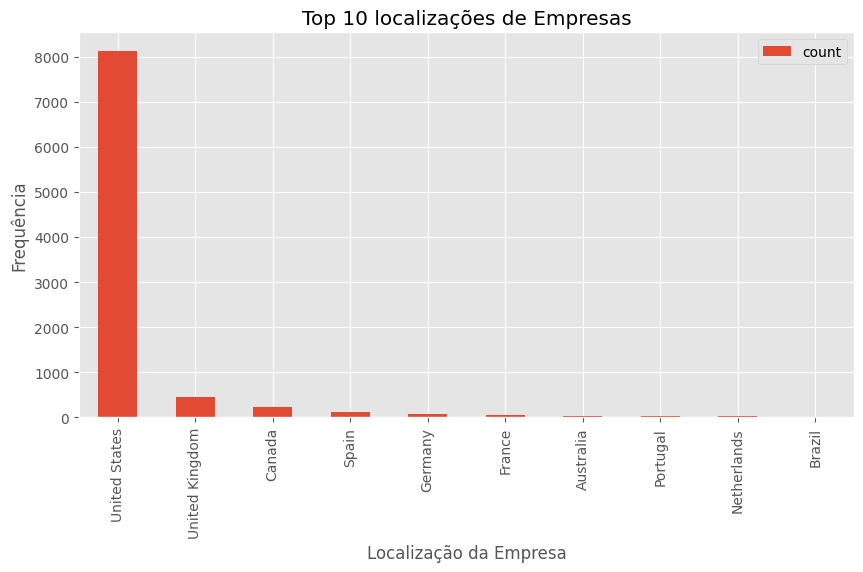

In [ ]:
df['company_location'].value_counts().head(10).plot(kind = 'bar', figsize=(10,5))
plt.title('Top 10 localizações de Empresas')
plt.xlabel('Localização da Empresa')
plt.ylabel('Frequência')
plt.legend()
plt.show()

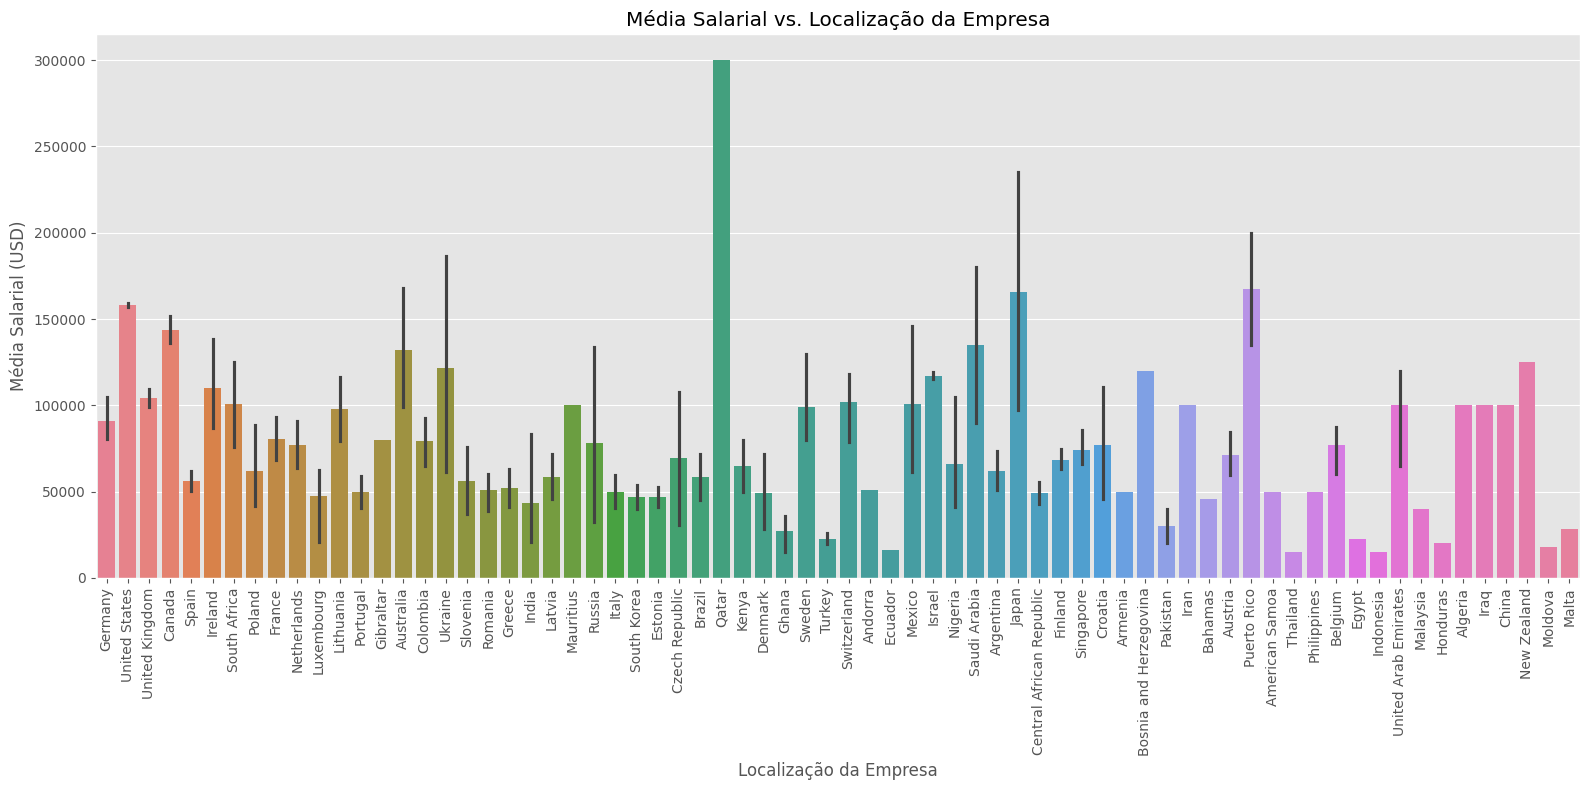

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x='company_location', y='salary_in_usd', data=df,hue='company_location')
plt.xticks(rotation=90)
plt.xlabel('Localização da Empresa')
plt.ylabel('Média Salarial (USD)')
plt.title('Média Salarial vs. Localização da Empresa')
plt.tight_layout()
plt.show()


**Conclusão**

A variável apresenta 70 países que sediam essas empresas. Podemos observar que o país que contém mais empresas é o Estados Unidos.
Contudo o top 10 países que possuem a maior média salarial são:

      1. Catar
      2. Porto Rico
      3. Japão
      4.  Estados Unidos
      5. Canada
      6. Arábia Saúdita
      7. Australia
      8. Bosnia Erzegovina
      9. Nova Zelândia
      10. Ucrânia
Este dados são influenciados pela quantidade de empregados que estão nesses países e pelas vagas que estão disponíveis nesses países, o que influenciam na média. Por exemplo neste conjunto de Dados temos apenas 1 empregado que trabalha no Catar. Para entedermos melhor o comportamento salarial, analisaremos todas as variaveis de acordo com as 3 vagas com o maior número de empregados

In [ ]:
df['company_size'].value_counts()

,count
company_size,
M,8448
L,748
S,159


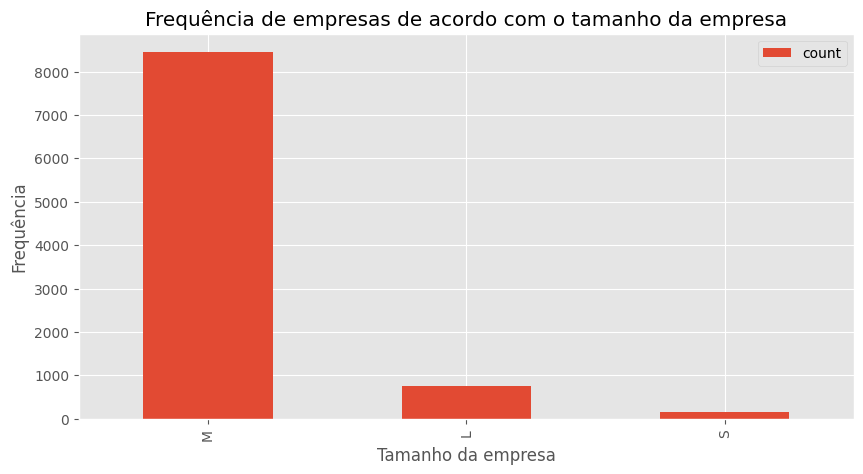

In [ ]:
df['company_size'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title('Frequência de empresas de acordo com o tamanho da empresa')
plt.xlabel('Tamanho da empresa')
plt.ylabel('Frequência')
plt.legend()
plt.show()

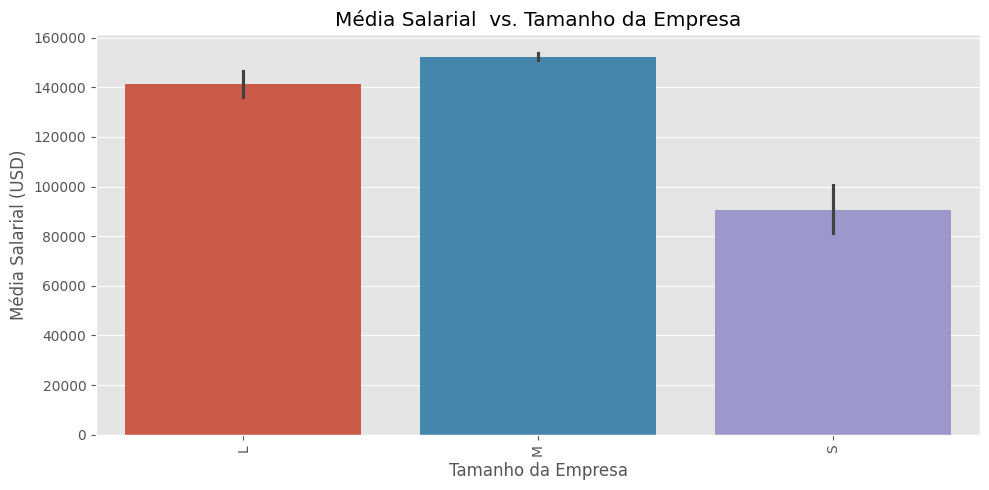

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='company_size', y='salary_in_usd', data=df,hue='company_size')
plt.xticks(rotation=90)
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Média Salarial (USD)')
plt.title('Média Salarial  vs. Tamanho da Empresa')
plt.tight_layout()
plt.show()

**Conclusão**

O tamanho das empresas são dividas entre grande (L), média (M) e pequena (S).
Pelos gráficos, concluímos que as empresas médias em média pagam um melhor salário e existem em maior quantidade neste dataset.

In [ ]:
df['employee_residence'].value_counts().head(10)

,count
employee_residence,
United States,8086
United Kingdom,442
Canada,224
Spain,117
Germany,66
France,54
Portugal,26
Netherlands,21
Australia,21


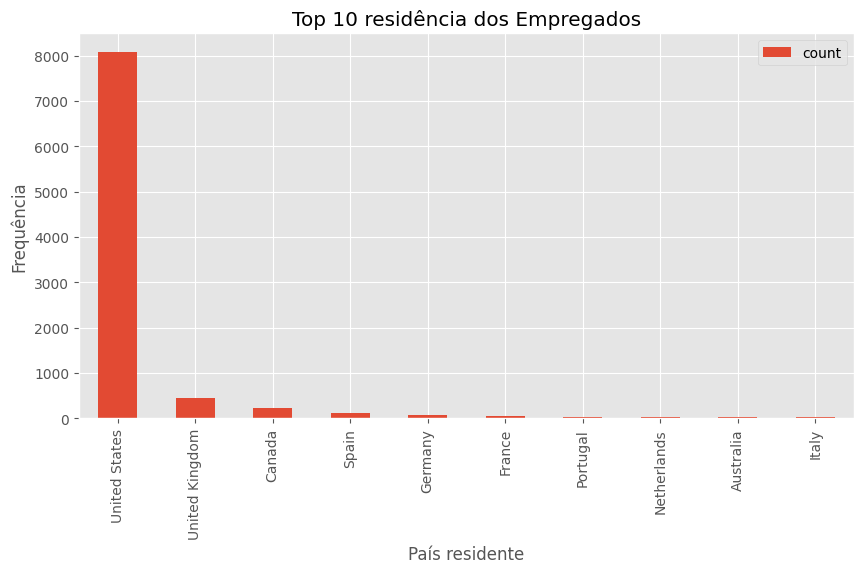

In [ ]:
df['employee_residence'].value_counts().head(10).plot(kind = 'bar', figsize=(10,5))
plt.title('Top 10 residência dos Empregados')
plt.xlabel('País residente')
plt.ylabel('Frequência')
plt.legend()
plt.show()

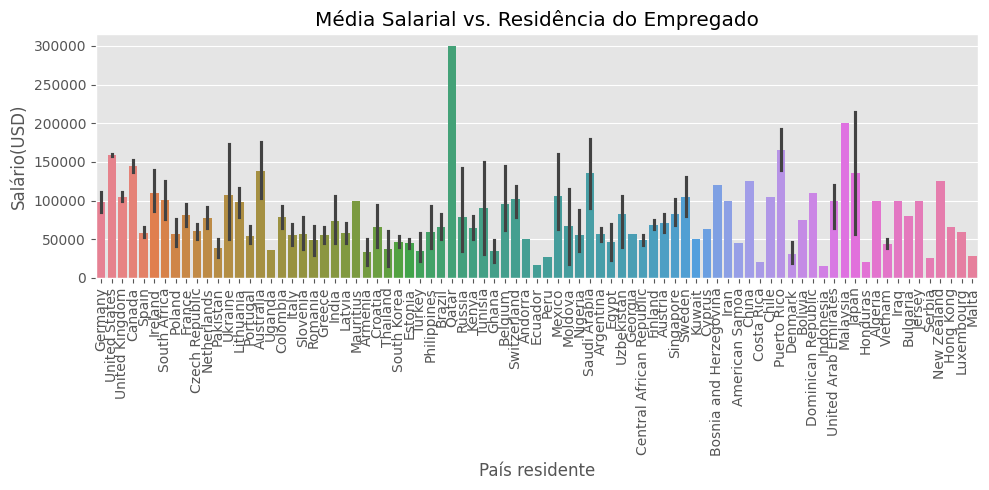

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='employee_residence', y='salary_in_usd', data=df,hue='employee_residence')
plt.xticks(rotation=90)
plt.xlabel('País residente')
plt.ylabel('Média Salarial (USD)')
plt.title('Média Salarial vs. Residência do Empregado')
plt.tight_layout()
plt.show()

**Conclusão**

A variável apresenta 83 países nos quais os empregados residem. Podemos observar que o país que contém mais empregados é o Estados Unidos.
Contudo o top 10 países que possuem a maior média salarial são:

      1. Catar
      2. Malásia
      3. Porto Rico
      4.  Estados Unidos
      5. Canada
      6. Japão
      6. Arábia Saúdita
      7. Australia
      8. Nova Zelândia
      9. China
      10. Bósnia Ezergovina


In [ ]:
df['employment_type'].value_counts()

,count
employment_type,
Full-time,9310
Contract,19
Part-time,15
Freelance,11


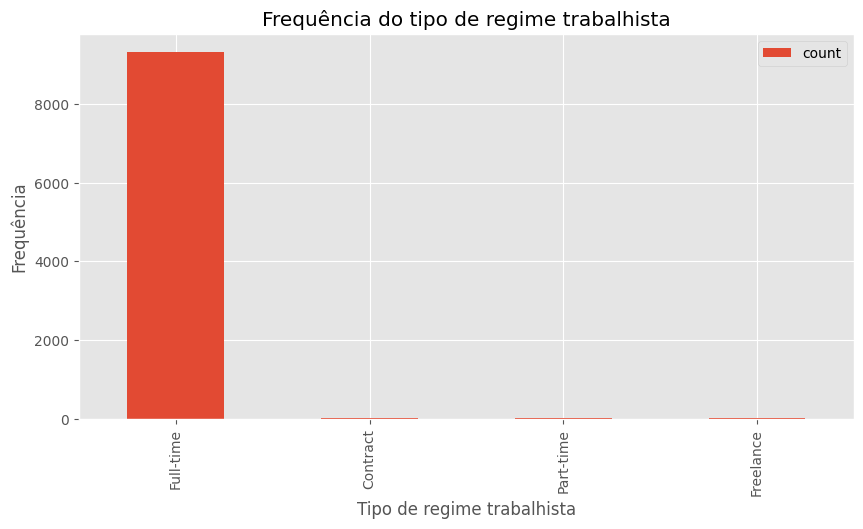

In [ ]:
df['employment_type'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title('Frequência do tipo de regime trabalhista')
plt.xlabel('Tipo de regime trabalhista')
plt.ylabel('Frequência')
plt.legend()
plt.show()

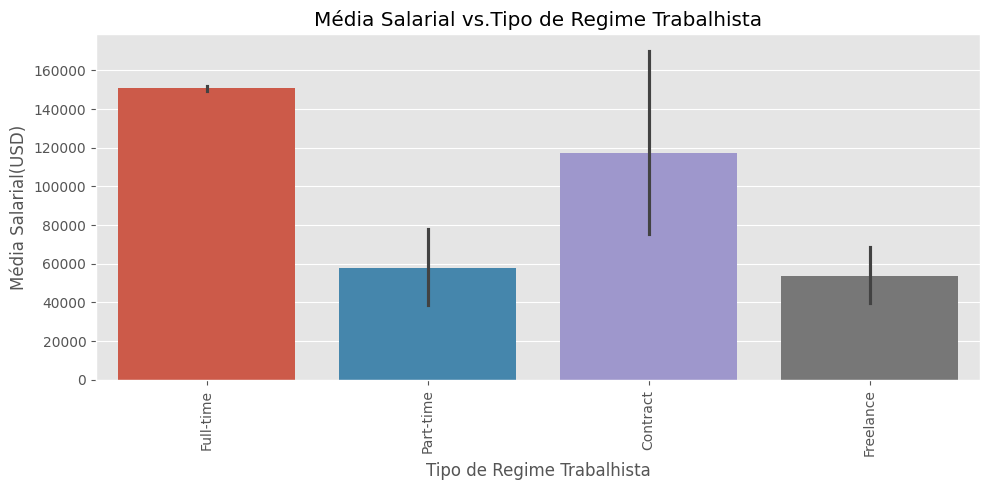

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='employment_type', y='salary_in_usd', data=df,hue='employment_type')
plt.xticks(rotation=90)
plt.xlabel('Tipo de Regime Trabalhista')
plt.ylabel('Média Salarial(USD)')
plt.title('Média Salarial vs.Tipo de Regime Trabalhista')
plt.tight_layout()
plt.show()

**Conclusão**

O tipo de Regime Trabalhista é categorizado em  Tempo Integral, Meio-período, Contrato e Freelancer. O tipo de regime trabalhista que se destaca é o trabalho de tempo integral, e o mesmo possue a maior média salarial.


In [ ]:
df['experience_level'].value_counts()

,count
experience_level,
Senior,6709
Mid-level,1869
Entry-level,496
Executive,281


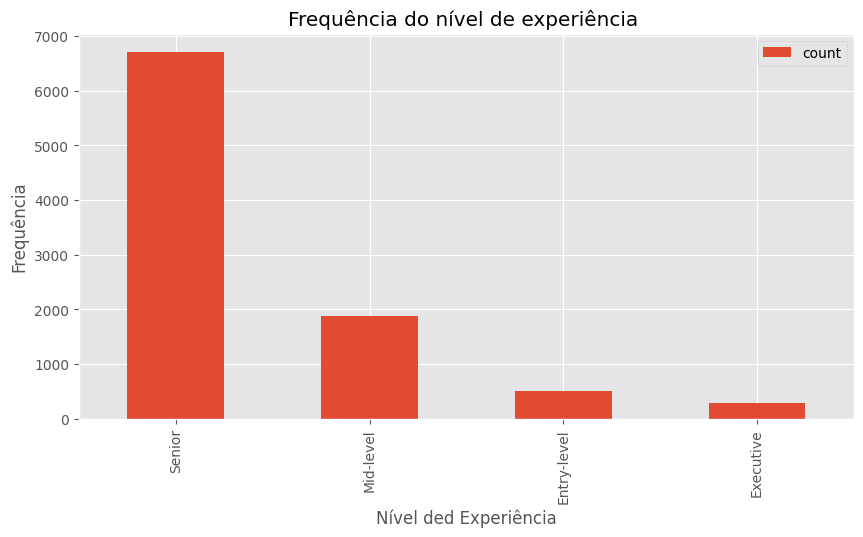

In [ ]:
df['experience_level'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title('Frequência do nível de experiência ')
plt.xlabel('Nível ded Experiência')
plt.ylabel('Frequência')
plt.legend()
plt.show()

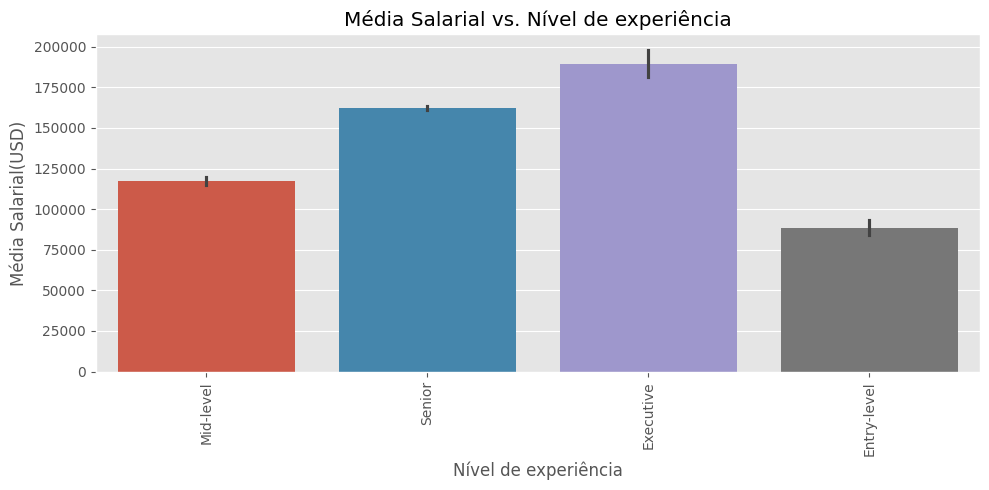

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='experience_level', y='salary_in_usd', data=df,hue='experience_level')
plt.xticks(rotation=90)
plt.xlabel('Nível de experiência')
plt.ylabel('Média Salarial(USD)')
plt.title('Média Salarial vs. Nível de experiência')
plt.tight_layout()
plt.show()

**Conclusão**

O nível de experiência é categorizado em Nível básico, Meio de Carreira, Sênior e Executivo. O nível de experiência que possui o maior número de pessoas é o nível sênior.

Quando comparamos a média da faixa salarial entre os níveis, temos que o nível executivo em média recebe mais.


In [ ]:
df['job_category'].value_counts()

,count
job_category,
Data Science and Research,3014
Data Engineering,2260
Data Analysis,1457
Machine Learning and AI,1428
Leadership and Management,503
BI and Visualization,313
Data Architecture and Modeling,259
Data Management and Strategy,61
Data Quality and Operations,55


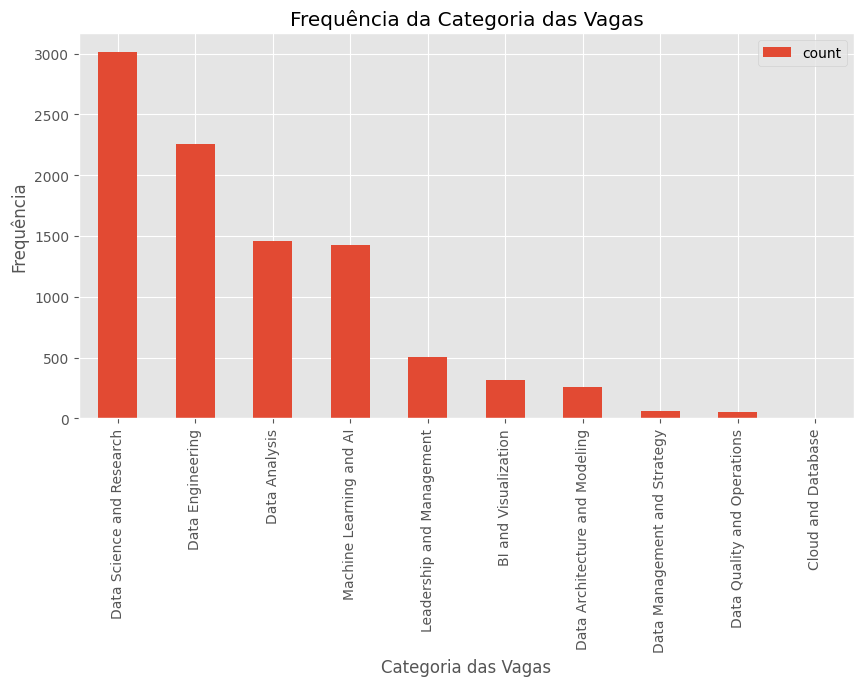

In [ ]:
df['job_category'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title('Frequência da Categoria das Vagas')
plt.xlabel('Categoria das Vagas')
plt.ylabel('Frequência')
plt.legend()
plt.show()

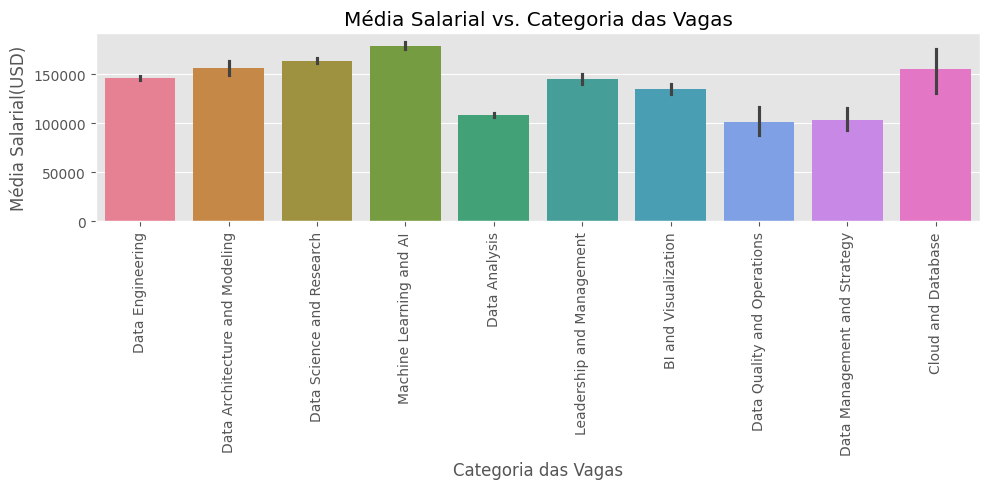

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='job_category', y='salary_in_usd', data=df,hue='job_category')
plt.xticks(rotation=90)
plt.xlabel('Categoria das Vagas')
plt.ylabel('Média Salarial(USD)')
plt.title('Média Salarial vs. Categoria das Vagas')
plt.tight_layout()
plt.show()

**Conclusão**

As vagas de emprego são categorizada 10 categorias.


  *   Engenharia de Dados
  *   Modelagem e Arquitetura de Dados
  *   Machine Learning e IA
  *   Análise de Dados
  *   Ciência de Dados e Pesquisa
  *   Liderança e Gerência
  *   BI e Visualização
  *   Qualidade de Dados e Operações
  *   Gerência de Dados e Estratégia
  *   Cloud e Banco de Dados

A categoria que possui mais empregados é a Ciência de Dados e Pesquisa. Já a categoria que possui a maior média salarial é categoria de Machine Learning e IA, o que faz sentido pois os dados analisados vão até o intervalo de 2023. Onde estava tendo o boom de IA.



In [ ]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df['work_setting'].value_counts()

,count
work_setting,
In-person,5730
Remote,3434
Hybrid,191


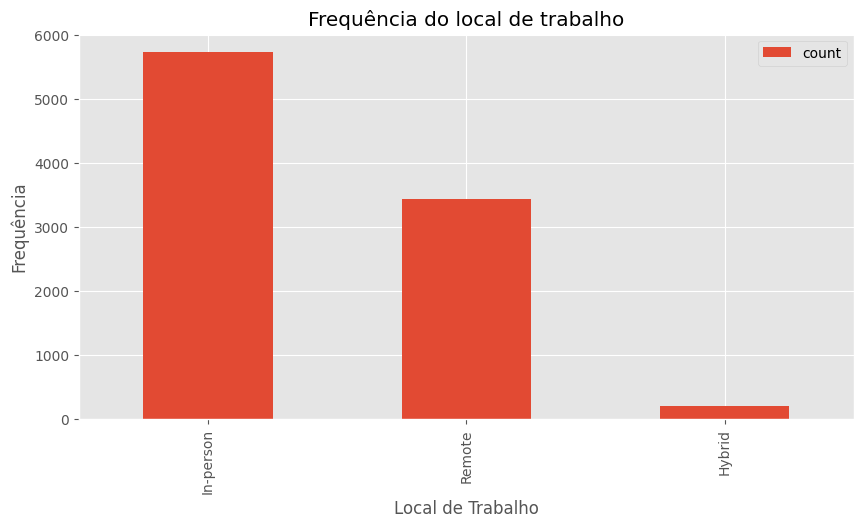

In [ ]:
df['work_setting'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title('Frequência do local de trabalho')
plt.xlabel('Local de Trabalho')
plt.ylabel('Frequência')
plt.legend()
plt.show()

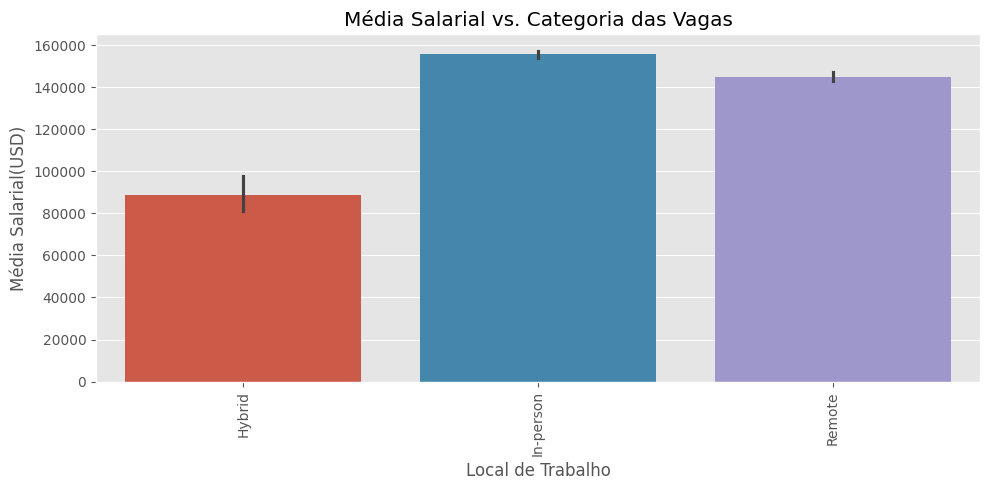

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='work_setting', y='salary_in_usd', data=df,hue='work_setting')
plt.xticks(rotation=90)
plt.xlabel('Local de Trabalho')
plt.ylabel('Média Salarial(USD)')
plt.title('Média Salarial vs. Local de Trabalho')
plt.tight_layout()
plt.show()

**Conclusão**

Os empregos são divididos em 3 categorias para o local de trabalho : Híbrido, Remoto e Presencial.

A maior quantidade de empregos na área de Dados é do tipo presencial, e também é o que possui a maior média salarial.

In [ ]:
df['salary_currency'].value_counts()

,count
salary_currency,
USD,8591
GBP,347
EUR,340
CAD,38
AUD,11
PLN,7
SGD,6
CHF,5
BRL,4


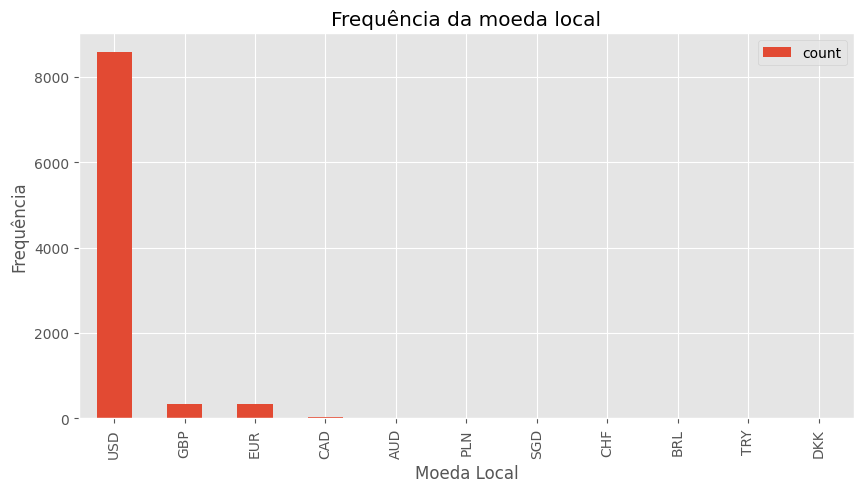

In [ ]:
df['salary_currency'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title('Frequência da moeda local')
plt.xlabel('Moeda Local')
plt.ylabel('Frequência')
plt.legend()
plt.show()

**Conclusão**

Temos diversas moedas nos quais os salários são cotados antes de serem transformados em dolar. A moeda local mais utilizada é o dólar e libra esterlina.

In [ ]:
df['work_year'].value_counts()

,count
work_year,
2023,7453
2022,1634
2021,197
2020,71


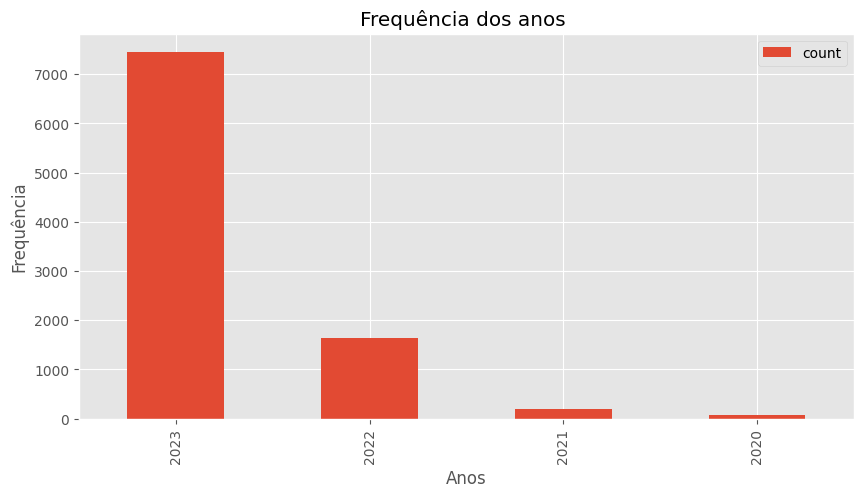

In [ ]:
df['work_year'].value_counts().plot(kind = 'bar', figsize=(10,5))
plt.title('Frequência dos anos ')
plt.xlabel('Anos')
plt.ylabel('Frequência')
plt.legend()
plt.show()

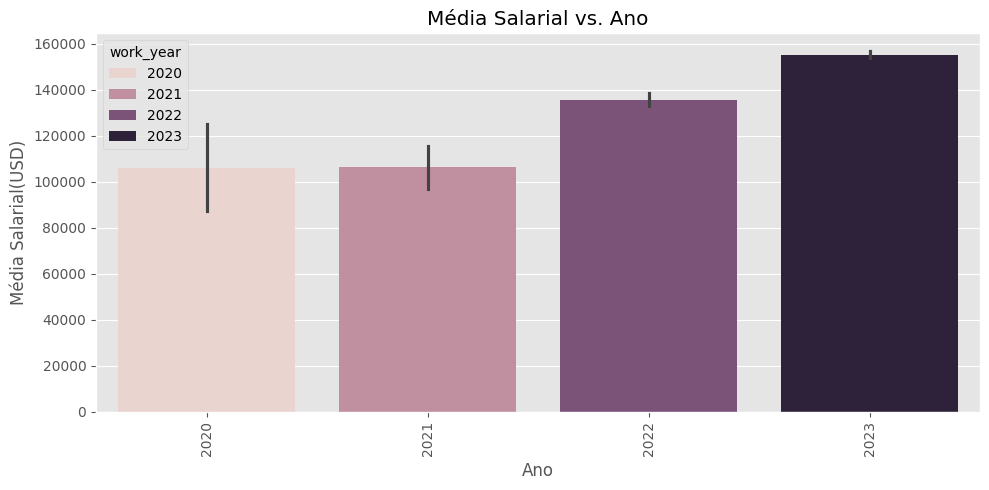

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='work_year', y='salary_in_usd', data=df,hue='work_year')
plt.xticks(rotation=90)
plt.xlabel('Ano')
plt.ylabel('Média Salarial(USD)')
plt.title('Média Salarial vs. Ano')
plt.tight_layout()
plt.show()

**Conclusão**

O ano que mais teve vagas na área de Dados foi 2023 e o mesmo possui a maior média salarial

## Coeficientes de Correlação

Como o conjunto de dados é pequeno podemos computar a correlação de Pearson por meio do método **corr()**. Contudo como a maioria dos dados são variáveis categóricas precisamos utilizar uma codificação para podermos computar sua correlação com as variávies numéricas.

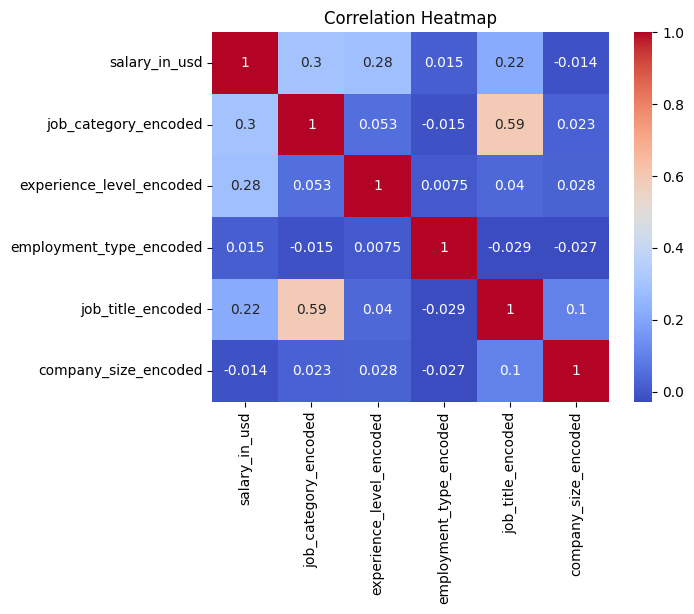

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])
df['job_category_encoded'] = label_encoder.fit_transform(df['job_category'])
df['employment_type_encoded'] = label_encoder.fit_transform(df['employment_type'])
df['job_title_encoded'] = label_encoder.fit_transform(df['job_title'])
df['company_size_encoded'] = label_encoder.fit_transform(df['company_size'])


corr_matrix = df[['salary_in_usd', 'job_category_encoded', 'experience_level_encoded','employment_type_encoded','job_title_encoded','company_size_encoded']].corr()
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Conclusão**

Percebemos que não há correlações significativas entre a variável alvo e as restantes.

## Análise das vagas

Como citado anteriormente é interessante a investigação separada dos três cargos que possuem mais pessoas trabalhando nelas. Esses títulos são comumente encontrados em plataformas de busca de emprego por isso, é relevante uma investigação mais profunda. As vagas em questão são : Engenheiro de Dados, Cientista de Dados e Analista de Dados.

Para esta análise mais profunda foram selecionados somente essas categorias de vaga no conjunto de dados e analisando conjuntamente com algumas variáveis relevantes para entender a distribuição da média salarial desta categoria.

In [ ]:

df_job_cat =df[df['job_title'].isin(['Data Engineer','Data Scientist','Data Analyst'])]


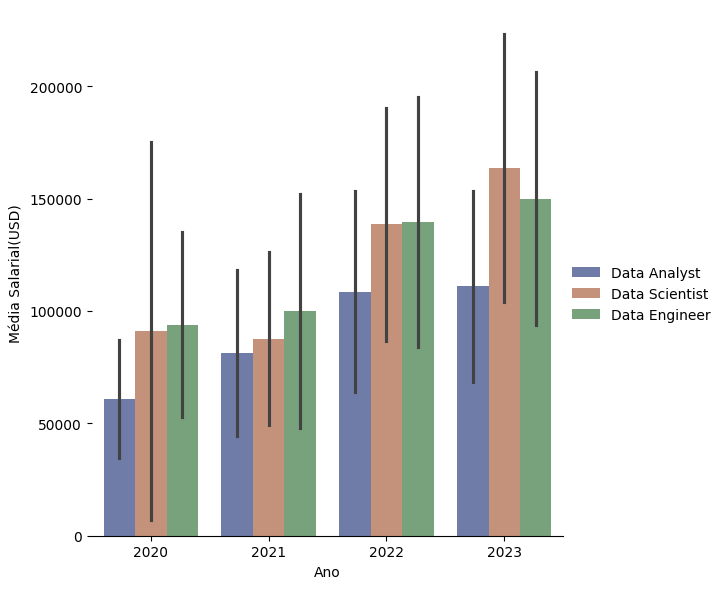

In [ ]:
g = sns.catplot(
    data=df_job_cat, kind="bar",
    x="work_year", y="salary_in_usd", hue="job_title",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Ano", "Média Salarial(USD)")
g.legend.set_title("")

**Conclusão**

Podemos ver acima que todos os cargos apresentaram um aumento na média salarial de acordo com os anos. Além disso, percebe-se uma grande diferença em termos salarias entre a categoria de Analista de Dados e as demais.

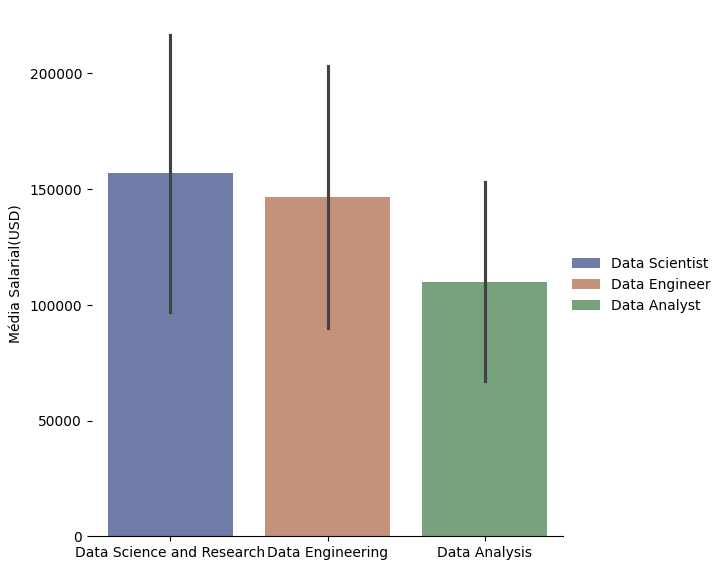

In [ ]:
g = sns.catplot(
    data=df_job_cat, kind="bar",
    x="job_category", y="salary_in_usd", hue="job_title",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Média Salarial(USD)")
g.legend.set_title("")

**Conclusão**

Podemos pereber no gráfico acima que a Caregoria Ciencia de Dados e Pesquisa, que engloba a profissão de Cientista de Dados, possui a maior média salarial.


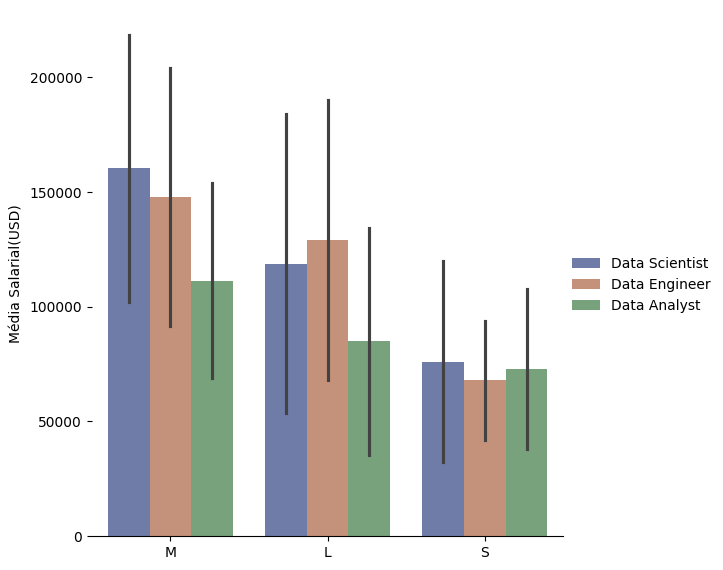

In [ ]:

g = sns.catplot(
    data=df_job_cat, kind="bar",
    x="company_size", y="salary_in_usd", hue="job_title",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Média Salarial(USD)")

g.legend.set_title("")

**Conclusão**

Como já tinhamos constatado em gráficos anteriores as empresas de médio porte pagam, em média, maiores salários que as demais. E isto é regular para todos os profissionais neste conjunto de dados

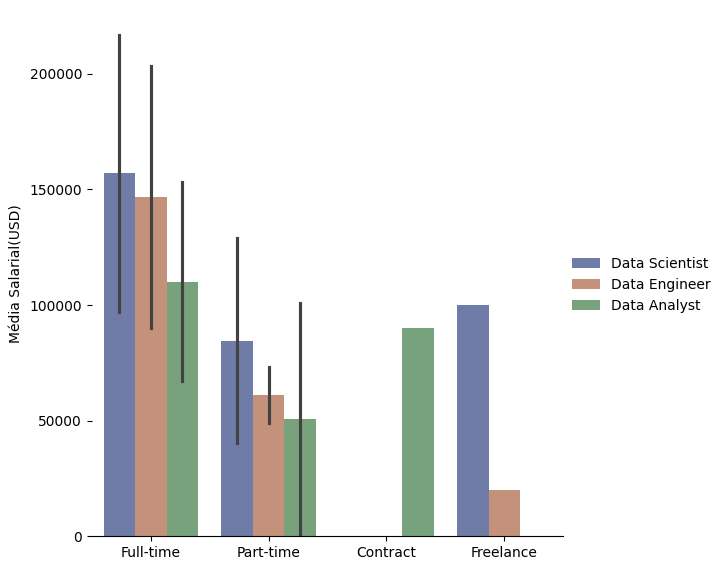

In [ ]:
g = sns.catplot(
    data=df_job_cat, kind="bar",
    x="employment_type", y="salary_in_usd", hue="job_title",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Média Salarial(USD)")

g.legend.set_title("")

**Conclusão**

Como também já constado, a categoria trabalho integral possui maior faixa salarial. Mas, as categorias Contrato e Freelance possuem um comportamento interessante. O gráfico mostra que as vagas por contrato são exclusivamente dominadas por analista de Dados. Enquanto na categoria Freelance é dominada por profissionais Cientistas de Dados

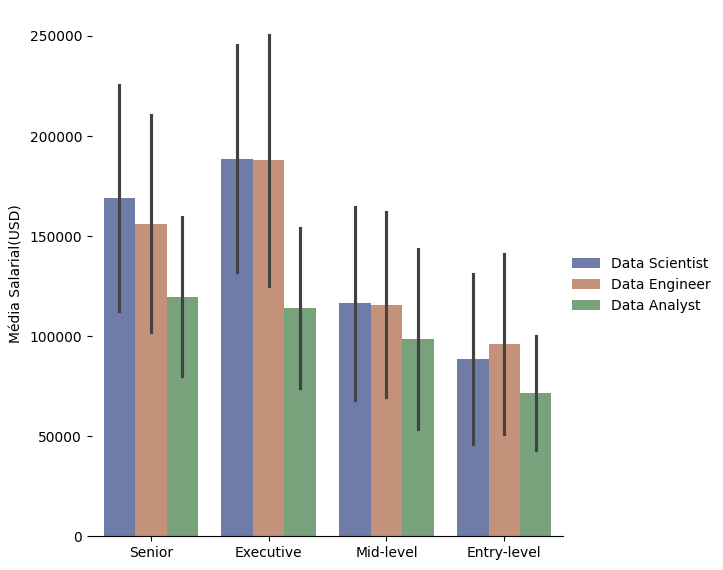

In [ ]:
g = sns.catplot(
    data=df_job_cat, kind="bar",
    x="experience_level", y="salary_in_usd", hue="job_title",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Média Salarial(USD)")

g.legend.set_title("")

**Conclusão**

Como já visto em outros gráficos acima, o nível de experiência que tem a maior média salarial é a executiva. Contudo, percebemos que não há diferença signficativa nesta media slarial quando estamos  falando de profissionais de Ciencia de Dados e de Engenharia de Dados.